Nicholas Li
Github repository: https://github.com/nick1ee1/dsci-final-prog.git

The topic for this project is to at the animals species that the WWF helped and see did the help burn there pop back up and what are the posible future for those animals.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

All the data come from the WWF endangered species list(https://www.worldwildlife.org/species/directory?sort=extinction_status&direction=desc) and the population and population trend come from the IUCN Red List(https://www.iucnredlist.org/) 

in the geaph 'en = Endangered', 'ce = Critically Endangered', 'vn = Vulnerable', 'lc = Least Concern','nt = Near Threatened', 'ex = extinct'

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/nick1ee1/dsci-final-prog/main/Dsci%20datas%20-%20Sheet1.csv")
df.head(15)

,name,population,Pop. trend,area,status,threats
0,Amur Leopard,84,inc,asia,ce,Illegal trade
1,Black Rhino,6000,inc,africa,ce,Illegal trade
2,Bornean Orangutan,104700,dec,asia,ce,Illegal trade
3,Cross River Gorilla,250,dec,africa,ce,hunting
4,Eastern Lowland Gorilla,2600,dec,africa,ce,habitat lost
5,Hawksbill Turtle,-1,dec,marine,ce,Illegal trade
6,Javan Rhino,18,sta,asia,ce,Illegal trade and habitat lost
7,Bornean Orangutan,104700,dec,asia,ce,Illegal trade and hunting
8,Sumatran Orangutan,13846,dec,asia,ce,Illegal trade and hunting
9,Tapanuli Orangutan,800,dec,asia,ce,Illegal trade and hunting


Fitst let's plot the status of the species

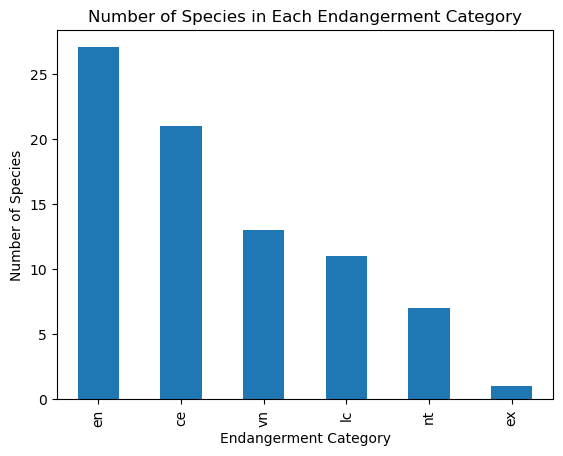

In [50]:
count = df['status'].value_counts()
ax =count.plot(kind='bar')

ax.set_title('Number of Species in Each Endangerment Category')
ax.set_xlabel('Endangerment Category')
ax.set_ylabel('Number of Species')
#ax.legend(['en = Endangered', 'ce = Critically Endangered', 'vn = Vulnerable', 'lc = Least Concern','nt = Near Threatened', 'ex = extinct'])

plt.show()

What area has the most endangered species based on the data?

In [51]:
area = df['area'].str.split(',').explode().str.strip().value_counts()
area

marine           31
asia             17
africa           13
south america     7
north america     7
arctic            3
un                1
australia         1
Name: area, dtype: int64

As shown in the result most of the endangered animals from WWF's list are marin life

As we all know human is the bigest threat all the animals face,but what are the specific action that is causing these marin life to become endangered

In [52]:
oce = df[(df['area'] == 'marine')]
threats = oce['threats'].str.split(',').explode().str.strip().value_counts()
threats
#d = df[(df['area'] == 'marine') & (df['threats'].str.contains('hunting'))]

hunting                           13
climate change                     6
habitat lost                       4
na                                 3
pollution                          2
Illegal trade                      1
pollution and human conflict       1
Illegal trade and habitat lost     1
Name: threats, dtype: int64

As shown in the result, hunting (for marine life, fishing) is the most troubling problem a marine life faces. Many of those marine animals were hunted for their flesh, like shark fins. After they cut the fin, they let the shark back in the water, and without fins, a shark is going to have an extremely hard time getting food; they always die shortly after they are released.

Based on the 50/500 rule(a minimum population size of 50 was necessary to combat inbreeding and a minimum of 500 individuals was needed to reduce genetic drift) how many have less than 50 and how many have less than 500?

In [53]:
less50 = df[(df['population'] > 0) & (df['population'] < 50)]
less500 = df[df['population'] > 50 & (df['population'] < 500)]
print("The number of species with less than 50 in populations")
print(less50['name'].count())
print(less50['name'])
print("The number of species with less than 500 in populations")
print(less500['name'].count())
print(less500['name'])

The number of species with less than 50 in populations
3
6        Javan Rhino
12    Sumatran Rhino
14           Vaquita
Name: name, dtype: object
The number of species with less than 500 in populations
55
0                     Amur Leopard
1                      Black Rhino
2                Bornean Orangutan
3              Cross River Gorilla
4          Eastern Lowland Gorilla
6                      Javan Rhino
7                Bornean Orangutan
8               Sumatran Orangutan
9               Tapanuli Orangutan
10                           Saola
11               Sumatran Elephant
12                  Sumatran Rhino
13                     Sunda Tiger
14                         Vaquita
16        Yangtze Finless Porpoise
18                African Wild Dog
19                  Asian Elephant
20             Black-footed Ferret
21                      Blue Whale
23                          Bonobo
24                Bornean Elephant
25                      Chimpanzee
26                       

As shown in other research inbreeding can cause many defects for the new borns and will drastically reduc the rate of survival, thus having a population less than 50 will face a even harder challeng to come out of the endangered list,
Although populations smaller than 500 won't have inbreeding problems, they still face the problem of genetic drift, which may cause gene variants to disappear completely and thereby reduce genetic variation.

Now with the help of the foundation how many species are seeing an increase in their population?

In [54]:
inc = df[(df['Pop. trend'] == 'inc')]
inc

,name,population,Pop. trend,area,status,threats
0,Amur Leopard,84,inc,asia,ce,Illegal trade
1,Black Rhino,6000,inc,africa,ce,Illegal trade
21,Blue Whale,15000,inc,marine,en,habitat lost
22,Bluefin Tuna,-1,inc,marine,en,hunting
32,Indus River Dolphin,1987,inc,marine,en,hunting
35,Mountain Gorilla,600,inc,africa,en,habitat lost
40,Sei Whale,50000,inc,marine,en,hunting
47,Giant Panda,1000,inc,asia,vn,habitat lost
50,Greater One-Horned Rhino,2200,inc,asia,vn,habitat lost
70,Bowhead Whale,10000,inc,marine,lc,climate change


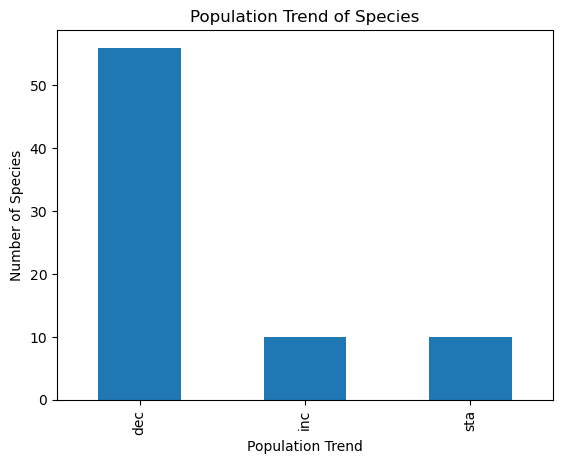

In [55]:
mask = df['Pop. trend'] != 'un'
dfn = df[mask]

count = dfn['Pop. trend'].value_counts()
ax =count.plot(kind='bar')

ax.set_title('Population Trend of Species')
ax.set_xlabel('Population Trend')
ax.set_ylabel('Number of Species')
#ax.legend(['en = Endangered', 'ce = Critically Endangered', 'vn = Vulnerable', 'lc = Least Concern','nt = Near Threatened', 'ex = extinct'])

plt.show()

In conclusion with the help of the foundation, although most species are still decresing in numbers but some species have seen an increase or have stabilize in number 